**Imbalanced MNIST Dataset**

In [1]:
import torch
from torch.utils.data import Subset, DataLoader
import torchvision
import torchvision.transforms as transforms

Load the Standard MNIST Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training set
mnist_train = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 21.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 824kB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.50MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Class '9' to downsample

In [3]:
# Collect indices of all '9' images
label_to_imbalance = 9  # The class we want to reduce
indices_of_label9 = [i for i, (img, label) in enumerate(mnist_train) if label == label_to_imbalance]

Set the Imbalance Ratio

In [4]:
imbalance_ratio = 0.1  # 10% of '9' samples
keep_count = int(len(indices_of_label9) * imbalance_ratio)

# Slice the first 'keep_count' examples
indices_of_label9_imbalanced = indices_of_label9[:keep_count]


Gather Indices of the Other Classes

In [5]:
other_indices = [i for i, (img, label) in enumerate(mnist_train) if label != label_to_imbalance]

# Final pool of indices = all other digits + the reduced set of '9'
final_indices = other_indices + indices_of_label9_imbalanced

Create a Subset

In [6]:
mnist_train_imbalanced = Subset(mnist_train, final_indices)

Wrap in a DataLoader

In [8]:
train_loader_imbalanced = DataLoader(
    mnist_train_imbalanced,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

The Resulting Dataset

In [ ]:
import matplotlib.pyplot as plt

# Create a counter for each digit class (0 through 9)
counts = [0] * 10  

# Iterate through samples and increment the appropriate class count
for i in range(len(mnist_train_imbalanced)):
    # mnist_train_imbalanced[i] is a tuple: (image, label)
    _, label = mnist_train_imbalanced[i]
    counts[label] += 1

print("Class counts:", counts)


Class counts: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 594]


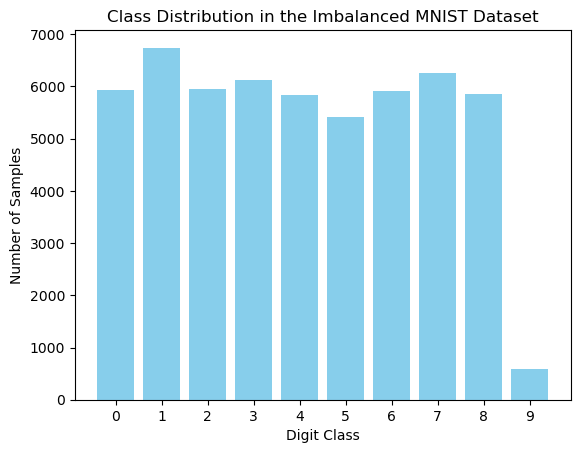

In [10]:
# Plot a bar chart of the counts
plt.bar(range(10), counts, color='skyblue')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Imbalanced MNIST Dataset')
plt.xticks(range(10))  # Ensure the x-axis has labels 0 through 9
plt.show()

Compare with the Original MNIST

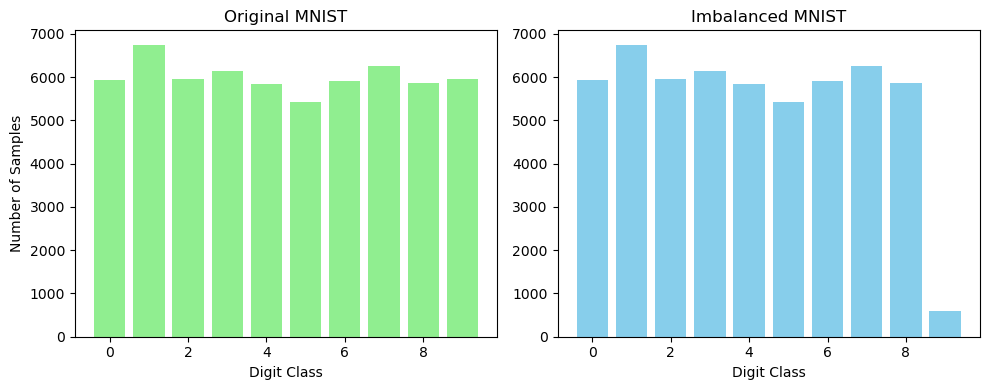

In [12]:
# Original MNIST counts (for reference)
orig_counts = [0]*10
for i in range(len(mnist_train)):
    _, label = mnist_train[i]
    orig_counts[label] += 1

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left: Original distribution
axes[0].bar(range(10), orig_counts, color='lightgreen')
axes[0].set_title('Original MNIST')
axes[0].set_xlabel('Digit Class')
axes[0].set_ylabel('Number of Samples')

# Right: Imbalanced distribution
axes[1].bar(range(10), counts, color='skyblue')
axes[1].set_title('Imbalanced MNIST')
axes[1].set_xlabel('Digit Class')

plt.tight_layout()
plt.show()
